In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format='{:,.2f}'.format
data=pd.read_csv('data_zoopla_edinburgh.csv')
data.index.rename('property_index',inplace=True)
data.head()

,title,address,latitude,longitude,price,description,features,number_beds,number_baths,images,letting_agent_name,available_from
property_index,,,,,,,,,,,,
0,2 bed flat to rent,"Orchard Brae Avenue, Edinburgh EH4",NaN,NaN,£950 pcm,"Stunning double two bedroom, fully furnished a...","Furnished,Central Heating,Private Parking",2 beds,NaN,https://lid.zoocdn.com/u/480/360/de9ff26fa8a20...,Northwood Residential Lettings (Edinburgh),Available from 19 January 2022
1,1 bed flat to rent,"Drumdryan Street, 3F2, Edinburgh, City Of Edin...",NaN,NaN,"£1,100 pcm",Available now – furnished – no pets – no stude...,NaN,1 bed,1 bath,https://lid.zoocdn.com/u/480/360/a5a93c8c685e4...,"Clyde Property, Edinburgh",Available immediately
2,2 bed flat to rent,"Parkhead Loan, Saughton, Edinburgh EH11",NaN,NaN,£875 pcm,"Two bedroom property in Parkhead, Edinburgh, E...","Part furnished,Central Heating,No Smoking,No p...",2 beds,NaN,https://lid.zoocdn.com/u/480/360/335dc83f702c8...,Milards,Available from 17 December 2021
3,2 bed flat to rent,"Springfield, Edinburgh EH6",NaN,NaN,£900 pcm,"Property Reference: 1276989.,Bright modern, fu...","Furnished,No Agent Fees,Property Reference Num...",2 beds,1 bath,https://lid.zoocdn.com/u/480/360/24fbdf3eb834c...,OpenRent,Available from 08 January 2022
4,3 bed flat to rent,"Avon Road, Cramond, Edinburgh EH4",NaN,NaN,"£1,250 pcm",This spacious property is accessed via a well ...,"Furnished,Central Heating,Private Parking,Park...",3 beds,NaN,https://lid.zoocdn.com/u/480/360/e9a54640963c7...,Connell & McFadden,Available from 03 January 2022


In [39]:
#Cleaning columns 'price','number_beds' and 'number_baths' 
#and converting them to numeric values

data['price']=data['price'].str.replace('[£, pcmw]','')
data['number_beds']=data['number_beds'].str.replace('[beds ]','')
data['number_baths']=data['number_baths'].str.replace('[ baths]','')

data['price']=pd.to_numeric(data['price'])
data['number_beds']=pd.to_numeric(data['number_beds'])
data['number_baths']=pd.to_numeric(data['number_baths'])

C:\Users\usuario\AppData\Local\Temp/ipykernel_5956/814890878.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['price']=data['price'].str.replace('[£, pcmw]','')
C:\Users\usuario\AppData\Local\Temp/ipykernel_5956/814890878.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['number_beds']=data['number_beds'].str.replace('[beds ]','')
C:\Users\usuario\AppData\Local\Temp/ipykernel_5956/814890878.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['number_baths']=data['number_baths'].str.replace('[ baths]','')


In [40]:
#Cleaning columns 'available_from' 
#and converting it to datetime values

data['available_from']=data['available_from'].str.replace(r'(Available from )?','')
data['available_from']=pd.to_datetime(data['available_from'],errors='coerce')
data['available_from'].fillna(pd.to_datetime('today'),inplace=True)


C:\Users\usuario\AppData\Local\Temp/ipykernel_5956/2937408805.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['available_from']=data['available_from'].str.replace(r'(Available from )?','')


In [41]:
#Brief analysis about number of letting agents 
#and number of properties available to rent

number_of_agents=data['letting_agent_name'].value_counts().count()
number_of_properties=data['letting_agent_name'].value_counts().sum()
print('Number of agents: {}'.format(number_of_agents))
print('Number of properties: {}'.format(number_of_properties))

Number of agents: 85
Number of properties: 446


In [42]:
#Market share in % for the 10 biggest agencies

market_share=data['letting_agent_name'].value_counts().head(10)/data['letting_agent_name'].value_counts().sum()
market_share=market_share.rename('Market share by agency. First 10 agencies')
market_share

DJ Alexander Lettings Ltd                    0.15
Homelike Internet GmbH                       0.08
Southside Property Management                0.08
Murray & Currie Property                     0.05
Houst Lets                                   0.04
Ben Property Management Ltd                  0.04
Rooks Estate Agents & Lettings               0.03
OpenRent                                     0.03
Northwood Residential Lettings (Edinburgh)   0.03
Gilson Gray LLP                              0.03
Name: Market share by agency. First 10 agencies, dtype: float64

In [ ]:
#Splitting images urls. This need more processing
data['images']=data['images'].str.split(',')
data['images']

In [44]:
# Data available about coordinates
(data[['latitude','longitude']].dropna().shape)[0]/(data[['latitude','longitude']].shape)[0]

# Only 25% of the properties have coordinates. Another API that produces better results
# must be evaluated

0.2533632286995516

<AxesSubplot:ylabel='Frequency'>

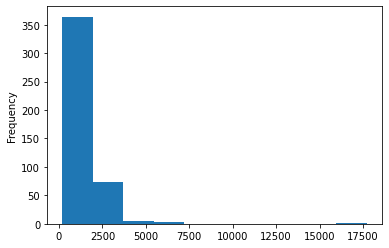

In [45]:
#First histogram of rent prices

data['price'].plot(kind='hist')

#Most of the properties have rents below 2500pcm

Text(0, 0.5, 'Number of properties available')

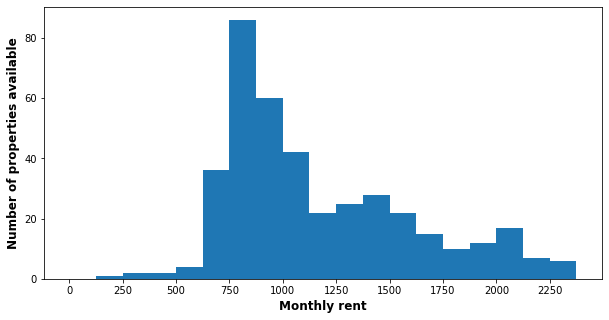

In [147]:
#Histogram with rents below 2500pcm

fig,ax=plt.subplots(figsize=(10,5))
data_less_2500=data[data['price']<=2500]
ax.hist(data_less_2500['price'],bins=np.arange(0,2500,125))
ax.set_xticks(np.arange(0,2500,250))
ax.set_xlabel('Monthly rent',fontsize=12,fontweight='heavy')
ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')

#There is a huge offer for properties from above 750pcm

C:\Users\usuario\AppData\Local\Temp/ipykernel_5956/3907283776.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data['waiting_period_days']=data['available_from'].apply(lambda x:(x-pd.datetime.now()).days)


Text(0, 0.5, 'Number of properties available')

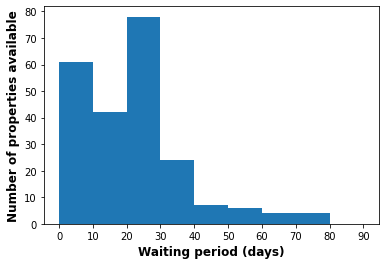

In [158]:
fig,ax=plt.subplots()

data['waiting_period_days']=data['available_from'].apply(lambda x:(x-pd.datetime.now()).days)

waiting_period_days_after_3_days=data[(data['waiting_period_days']<100) & (data['waiting_period_days']>3)]['waiting_period_days']
waiting_period_days_after_3_days
ax.hist(waiting_period_days_after_3_days.values,bins=np.arange(0,100,10))
ax.set_xticks(np.arange(0,100,10))
ax.set_xlabel('Waiting period (days)',fontsize=12,fontweight='heavy')
ax.set_ylabel('Number of properties available',fontsize=12,fontweight='heavy')
